<div style="background: linear-gradient(135deg,#0ea5e9,#a78bfa); padding:18px 20px; border-radius:16px; color:white; box-shadow:0 8px 20px rgba(0,0,0,0.15); font-family:system-ui,-apple-system,Segoe UI,Roboto,Ubuntu,Helvetica,Arial,sans-serif;">
  <div style="display:flex; align-items:center; gap:12px; margin-bottom:10px;">
    <span style="font-size:28px;">📊🔬</span>
    <h1 style="margin:0; font-size:22px; letter-spacing:0.3px;">Assignment 5 - Visualizing Data Veracity Challenges in Multi-Label Classification</h1>
  </div>

  <div style="display:flex; flex-wrap:wrap; gap:10px; margin:8px 0 16px;">
    <span style="background:rgba(255,255,255,0.2); padding:6px 10px; border-radius:999px; font-weight:600;">DA5401 • Data Analytics Lab</span>
    <span style="background:#22c55e; color:#062e0d; padding:6px 10px; border-radius:999px; font-weight:700;">A5 — Manifold Visualization</span>
    <span style="background:#fde68a; color:#7a4d00; padding:6px 10px; border-radius:999px; font-weight:700;">Dataset: Yeast</span>
  </div>

  <div style="background:rgba(255,255,255,0.9); color:#0f172a; padding:14px 16px; border-radius:12px; border-left:6px solid #0ea5e9; line-height:1.45;">
    <p style="margin:0;">
      <strong>Objective:</strong>
      Visually inspect the <strong>Yeast Dataset</strong> for data veracity issues
      (<em>noisy labels, outliers, hard-to-learn samples</em>) using
      <strong>t-SNE</strong> and <strong>Isomap</strong> dimensionality reduction techniques.
    </p>
  </div>

  <div style="display:grid; grid-template-columns: 1fr 1fr; gap:12px; margin-top:16px;">
    <div style="background:rgba(255,255,255,0.15); padding:12px 14px; border-radius:12px;">
      <div style="opacity:0.9; font-size:12px;">Course</div>
      <div style="font-weight:700;">DA5401 — DATA ANALYTICS LAB</div>
    </div>
    <div style="background:rgba(255,255,255,0.15); padding:12px 14px; border-radius:12px;">
      <div style="opacity:0.9; font-size:12px;">Assignment</div>
      <div style="font-weight:700;">A5 — Manifold Visualization</div>
    </div>
    <div style="background:rgba(255,255,255,0.15); padding:12px 14px; border-radius:12px;">
      <div style="opacity:0.9; font-size:12px;">Owner</div>
      <div style="font-weight:700;">JIGARAHEMAD K SHAIKH</div>
    </div>
    <div style="background:rgba(255,255,255,0.15); padding:12px 14px; border-radius:12px;">
      <div style="opacity:0.9; font-size:12px;">Roll Number</div>
      <div style="font-weight:700;">DA25M014</div>
    </div>
  </div>

  <div style="margin-top:14px; font-size:12px; opacity:0.95;">
    ✨ Plots color-blind-friendly.
  </div>
</div>


In [32]:
# === Global color-blind-friendly palette & helpers ===
# This cell sets a globally color-blind-safe palette for all plots that follow.
# It also provides helper utilities for discrete colormaps in scatter/contour plots.
import matplotlib as mpl
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except Exception:
    sns = None

# Paul Tol's palette (color-blind-friendly)
_TOL_COLORS = [
    '#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE',
    '#AA3377', '#BBBBBB', '#000000', '#88CCEE', '#44AA99',
    '#DDCC77', '#999933'
]

def cb_palette(n=None):
    # Return first n colors from Tol list
    if n is None or n > len(_TOL_COLORS):
        return _TOL_COLORS
    return _TOL_COLORS[:n]

def cb_cmap(n=None, name='cb_listed'):
    # Return a ListedColormap built from the first n CB-safe colors
    from matplotlib.colors import ListedColormap
    cols = cb_palette(n)
    return ListedColormap(cols, name=name)

# Set default color cycle for matplotlib
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=_TOL_COLORS)

# If seaborn is available, set a theme that uses our palette
if sns is not None:
    try:
        sns.set_theme(style='whitegrid')
        sns.set_palette(_TOL_COLORS)
    except Exception:
        pass

# Sensible defaults for readability
mpl.rcParams['figure.dpi'] = 110
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.25
print('Color-blind-friendly palette activated (Paul Tol).')


Color-blind-friendly palette activated (Paul Tol).


<div style="background: linear-gradient(120deg, #14b8a6, #3b82f6, #8b5cf6); padding:20px 24px; border-radius:16px; color:white; box-shadow:0 6px 18px rgba(0,0,0,0.15); font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Ubuntu, sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    ⚙️ <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">1. Setup and Library Imports</span>
  </h2>

  <p style="font-size:16px; line-height:1.6; background:rgba(255,255,255,0.15); padding:12px 16px; border-radius:10px;">
    This section imports all essential <strong>Python libraries</strong> required for 
    <span style="color:#fcd34d;">data manipulation</span>, 
    <span style="color:#a7f3d0;">preprocessing</span>, 
    <span style="color:#bae6fd;">dimensionality reduction</span>, and 
    <span style="color:#f9a8d4;">visualization</span>.
  </p>

  <div style="margin-top:10px; font-size:14px; opacity:0.9;">
    💡 <em> Libraries like <code>scikit-learn</code>, <code>matplotlib</code>, and <code>seaborn</code> 
    are updated to their latest versions for smoother compatibility.
  </div>
</div>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap

<div style="background: linear-gradient(120deg, #3b82f6, #8b5cf6, #a855f7); padding:20px 24px; border-radius:16px; color:white; box-shadow:0 6px 18px rgba(0,0,0,0.15); font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Ubuntu, sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🎨 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">Set Visualization Style</span>
  </h2>

  <p style="font-size:16px; line-height:1.6; background:rgba(255,255,255,0.15); padding:12px 16px; border-radius:10px;">
    This section configures the overall <strong>visualization aesthetics</strong> for plots using libraries such as 
    <code>matplotlib</code> and <code>seaborn</code>.  
    The style ensures that all charts are <span style="color:#fcd34d;">clear</span>, 
    <span style="color:#a7f3d0;">color-blind-friendly</span>, and 
    <span style="color:#bae6fd;">consistent</span> across the notebook.
  </p>

  <div style="margin-top:10px; font-size:14px; opacity:0.9;">
    💡 <em>Palettes like <code>colorblind</code> or <code>muted</code> and enable gridlines for clarity.
  </div>
</div>


In [34]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]
print("Libraries imported successfully.")

Libraries imported successfully.


<div style="background: linear-gradient(120deg, #0ea5e9, #6366f1, #a855f7); padding:20px 24px; border-radius:16px; color:white; box-shadow:0 6px 18px rgba(0,0,0,0.15); font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Ubuntu, sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    📂 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">2. Data Loading and Inspection</span>
  </h2>

  <p style="font-size:16px; line-height:1.6; background:rgba(255,255,255,0.15); padding:12px 16px; border-radius:10px;">
    In this section, we <strong>load the Yeast dataset</strong> into a <code>pandas</code> DataFrame and perform initial 
    <span style="color:#fcd34d;">inspection</span> to understand its structure.  
    We verify the <span style="color:#a7f3d0;">shape</span>, <span style="color:#bae6fd;">data types</span>, and check for 
    <span style="color:#f9a8d4;">missing values</span> or inconsistencies before moving on to analysis.
  </p>

  <div style="margin-top:10px; font-size:14px; opacity:0.9;">
    💡 <em> Use of <code>df.info()</code>, <code>df.describe()</code>, and <code>df.isnull().sum()</code>  
    to get a quick overview of dataset quality.
  </div>
</div>

✅ Dataset loaded successfully.
Shape of the dataset: (2417, 117)

--- First 5 Rows of the Dataset ---
       Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   

       Att8      Att9     Att10  ...  Class5  Class6  Class7  Class8  Class9  \
0  0.041850  0.066938 -0.056617  ...    b'0'    b'0'    b'1'    b'1'    b'0'   
1 -0.077933 -0.080529 -0.016267  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
2  0.013646 -0.040666 -0.024447  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
3 -0.007670  0.079438  0.062184  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
4  0.064456 -0.133387  0.068878  ...    b'1'   

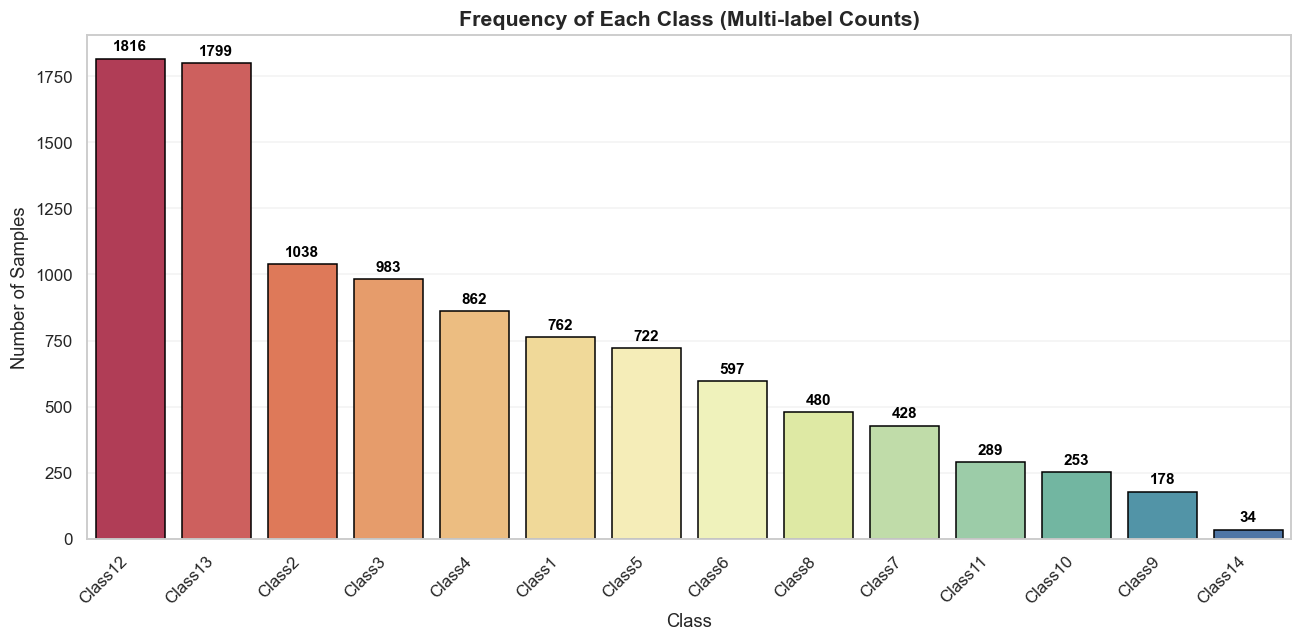

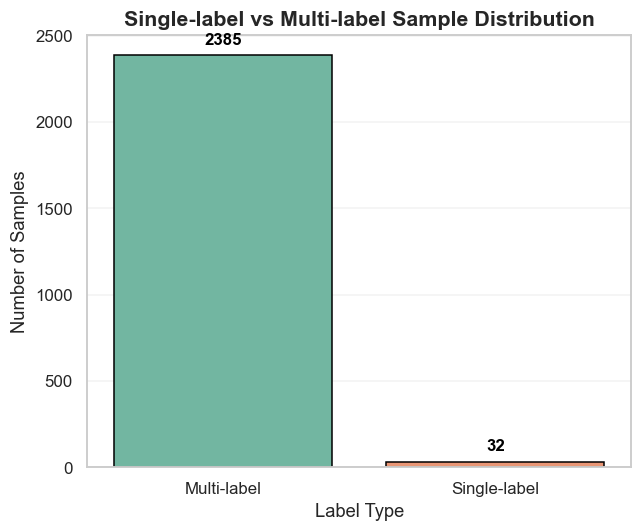


--- Label Statistics ---
Number of single-label samples: 32
Number of multi-label samples: 2385
Average number of labels per sample: 4.24


In [35]:
# Load the main dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color-blind-friendly theme
sns.set_theme(style="whitegrid", palette="colorblind")

# Load dataset
try:
    df = pd.read_csv('yeast.csv')
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'yeast.csv' not found. Please ensure the file is in the current directory.")
    df = None

if df is not None:
    print(f"Shape of the dataset: {df.shape}")
    print("\n--- First 5 Rows of the Dataset ---")
    print(df.head())

    # Identify class columns
    class_cols = [col for col in df.columns if col.startswith("Class")]

    # Convert b'0'/b'1' to integers 0/1
    for col in class_cols:
        df[col] = df[col].apply(lambda x: int(str(x).replace("b'", "").replace("'", "")))

    # --- 1️⃣ Plot class frequencies ---
    class_counts = df[class_cols].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    colors = sns.color_palette("Spectral", n_colors=len(class_counts))
    ax = sns.barplot(x=class_counts.index,hue=class_counts.index,legend=False, y=class_counts.values, palette=colors, edgecolor='black')

    plt.title("Frequency of Each Class (Multi-label Counts)", fontsize=14, weight='bold')
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Number of Samples", fontsize=12)
    plt.xticks(rotation=45, ha="right")

    # Add numeric labels above each bar
    for i, val in enumerate(class_counts.values):
        ax.text(i, val + max(class_counts.values) * 0.01, f"{int(val)}",
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    plt.tight_layout()
    plt.show()

    # --- 2️⃣ Plot single vs multi-label distribution ---
    df["num_labels"] = df[class_cols].sum(axis=1)
    df["Label_Type"] = df["num_labels"].apply(lambda x: "Single-label" if x == 1 else "Multi-label")

    label_type_counts = df["Label_Type"].value_counts().reset_index()
    label_type_counts.columns = ["Label_Type", "Count"]

    plt.figure(figsize=(6, 5))
    colors2 = sns.color_palette("Set2", n_colors=len(label_type_counts))
    ax2 = sns.barplot(data=label_type_counts, hue="Label_Type",legend=False,x="Label_Type", y="Count",palette=colors2, edgecolor='black')

    plt.title("Single-label vs Multi-label Sample Distribution", fontsize=14, weight='bold')
    plt.xlabel("Label Type", fontsize=12)
    plt.ylabel("Number of Samples", fontsize=12)

    # Add numeric labels on top of bars
    for index, row in label_type_counts.iterrows():
        ax2.text(index, row["Count"] + max(label_type_counts["Count"]) * 0.02,
                 f"{int(row['Count'])}",
                 ha="center", va="bottom", color="black", fontsize=11, fontweight="bold")

    plt.tight_layout()
    plt.show()

    # --- Print statistics ---
    print("\n--- Label Statistics ---")
    single_count = label_type_counts.loc[label_type_counts["Label_Type"] == "Single-label", "Count"].values[0]
    multi_count = label_type_counts.loc[label_type_counts["Label_Type"] == "Multi-label", "Count"].values[0]
    print(f"Number of single-label samples: {single_count}")
    print(f"Number of multi-label samples: {multi_count}")
    print(f"Average number of labels per sample: {df['num_labels'].mean():.2f}")


In [36]:
# 🧭 Display dataset structure and basic statistics
print("\n=== Dataset Overview ===")
print("Inspecting column names, data types, and overall structure...\n")
print(df.info())

print("\n=== Statistical Summary ===")
print("Summary of numerical columns (count, mean, std, min, max, etc.):\n")
print(df.describe())

# 🔍 Check for missing values
print("\n=== Missing Value Analysis ===")
missing_count = df.isnull().sum().sum()

if missing_count == 0:
    print("✅ No missing values detected in the dataset.")
else:
    print(f"⚠️ Total missing entries found: {missing_count}")


=== Dataset Overview ===
Inspecting column names, data types, and overall structure...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Columns: 119 entries, Att1 to Label_Type
dtypes: float64(103), int64(15), object(1)
memory usage: 2.2+ MB
None

=== Statistical Summary ===
Summary of numerical columns (count, mean, std, min, max, etc.):

              Att1         Att2         Att3         Att4         Att5  \
count  2417.000000  2417.000000  2417.000000  2417.000000  2417.000000   
mean      0.001173    -0.000436    -0.000257     0.000265     0.001228   
std       0.097411     0.097885     0.097746     0.096969     0.096909   
min      -0.371146    -0.472632    -0.339195    -0.467945    -0.367044   
25%      -0.053655    -0.058734    -0.057526    -0.057149    -0.058461   
50%       0.003649    -0.003513     0.002892    -0.000153     0.005565   
75%       0.057299     0.048047     0.061007     0.054522     0.066286   
max       0.520272     0.614114     0.3

<div style="background: linear-gradient(120deg, #10b981, #3b82f6, #8b5cf6); padding:22px 26px; border-radius:18px; color:white; box-shadow:0 6px 18px rgba(0,0,0,0.15); font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Ubuntu, sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🧩 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">3. Simplified Target Variable for Visualization</span>
  </h2>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.15); padding:12px 16px; border-radius:10px;">
    To make the <strong>multi-label Yeast dataset</strong> visually interpretable in a 2D scatter plot,  
    the <span style="color:#fde68a;">14 binary class indicators</span> are consolidated into 
    <strong>four broader categories</strong> for effective color-coding.  
    Since the data is <span style="color:#a7f3d0;">highly imbalanced</span> — containing a single-label class and multiple rare combinations —  
    including every combination individually would produce a <span style="color:#f9a8d4;">noisy and fragmented</span> visualization.
  </p>

  <div style="margin-top:12px; background:rgba(255,255,255,0.1); padding:14px 18px; border-radius:12px;">
    <h4 style="margin-top:0; color:#fcd34d;">🎯 Grouping Strategy:</h4>
    <ul style="margin:0; line-height:1.6;">
      <li><strong style="color:#facc15;">L1 (Single-Label Class):</strong> The only single-label group present — <code>Class1</code>.</li>
      <li><strong style="color:#86efac;">C1 (Top Multi-Label Combination):</strong> Most frequent multi-label pattern across samples.</li>
      <li><strong style="color:#93c5fd;">C2 (Second Multi-Label Combination):</strong> The second most common pattern.</li>
      <li><strong style="color:#f9a8d4;">Other:</strong> All remaining rare single or multi-label samples combined.</li>
    </ul>
  </div>

  <div style="margin-top:14px; font-size:15px; line-height:1.6; background:rgba(255,255,255,0.15); padding:12px 16px; border-radius:10px;">
    ✅ This grouping ensures that the visualization:<br>
    • Uses <strong>four distinct, interpretable color categories</strong>.<br>
    • Highlights the <strong>dominant structural patterns</strong>.<br>
    • Avoids clutter caused by <strong>rare label combinations</strong>.
  </div>

</div>

In [37]:
from sklearn.preprocessing import StandardScaler

# --- Data Loading and Preprocessing ---
df = pd.read_csv('yeast.csv')
feature_cols = [col for col in df.columns if col.startswith('Att')]
label_cols = [col for col in df.columns if not col.startswith('Att')]

def clean_label(val):
    if isinstance(val, str):
        return int(val.strip("b'").strip("'"))
    return int(val)

Y_raw = df[label_cols]
Y = Y_raw.map(clean_label)

# 1. Determine the Top Categories (L1, C1, C2)
L1_name = 'Class1' # Only single-label class found
L1_mask = (Y.sum(axis=1) == 1) & (Y[L1_name] == 1)

# Convert multi-label rows to string combinations to count frequency
Y_str_combinations = Y.apply(lambda row: "".join(row.values.astype(str)), axis=1)
multi_label_mask = Y.sum(axis=1) > 1
top_multi_combinations = Y_str_combinations[multi_label_mask].value_counts().nlargest(2)

C1_combination_str = top_multi_combinations.index[0]
C2_combination_str = top_multi_combinations.index[1]

C1_name = f"Multi: {C1_combination_str}"
C2_name = f"Multi: {C2_combination_str}"
OTHER_NAME = 'Other (Remaining)'

# Define all categories explicitly (FIX for TypeError)
all_categories = [L1_name, C1_name, C2_name, OTHER_NAME]
cat_type = pd.CategoricalDtype(categories=all_categories)

# 2. Create Y_simplified series with pre-defined categories
Y_simplified = pd.Series(OTHER_NAME, index=Y.index, dtype=cat_type)

# Create masks for C1 and C2
C1_mask = Y_str_combinations == C1_combination_str
C2_mask = Y_str_combinations == C2_combination_str

# Assign category names (This now works without TypeError)
Y_simplified[L1_mask] = L1_name
Y_simplified[C1_mask] = C1_name
Y_simplified[C2_mask] = C2_name

print("Simplified Target Variable created successfully.")

print("\n--- Summary of Simplified Categories ---")
print(f"L1 (Most Frequent Single Label): '{L1_name}'")
print(f"  Dimension/Count: {L1_mask.sum()}")
print(f"C1 (Most Frequent Multi-Label Combination): '{C1_name}'")
print(f"  Dimension/Count: {C1_mask.sum()}")
print(f"C2 (Second Most Frequent Multi-Label Combination): '{C2_name}'")
print(f"  Dimension/Count: {C2_mask.sum()}")
print(f"Other (Remaining Samples): '{OTHER_NAME}'")
print(f"  Dimension/Count: {Y_simplified.value_counts()[OTHER_NAME]}")

print("\nDistribution of Y_simplified:")
print(Y_simplified.value_counts())

Simplified Target Variable created successfully.

--- Summary of Simplified Categories ---
L1 (Most Frequent Single Label): 'Class1'
  Dimension/Count: 32
C1 (Most Frequent Multi-Label Combination): 'Multi: 00110000000110'
  Dimension/Count: 237
C2 (Second Most Frequent Multi-Label Combination): 'Multi: 00011000000110'
  Dimension/Count: 233
Other (Remaining Samples): 'Other (Remaining)'
  Dimension/Count: 1915

Distribution of Y_simplified:
Other (Remaining)        1915
Multi: 00110000000110     237
Multi: 00011000000110     233
Class1                     32
Name: count, dtype: int64


<div style="background: linear-gradient(120deg, #f97316, #ec4899, #8b5cf6); padding:24px 28px; border-radius:18px; color:white; box-shadow:0 8px 20px rgba(0,0,0,0.15); font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Ubuntu, sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    ⚗️ <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">4. Data Preprocessing: Feature Scaling</span>
  </h2>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.15); padding:12px 16px; border-radius:10px;">
    Dimensionality reduction techniques such as <strong>t-SNE</strong> and <strong>Isomap</strong> are 
    <span style="color:#fde68a;">highly sensitive</span> to the scale of features.  
    This step prepares the dataset by standardizing and structuring it for accurate manifold learning.
  </p>

  <div style="margin-top:12px; background:rgba(255,255,255,0.1); padding:14px 18px; border-radius:12px;">
    <h4 style="margin-top:0; color:#facc15;">🧮 Preprocessing Steps:</h4>
    <ul style="margin:0; line-height:1.6;">
      <li><strong style="color:#fde68a;">Separating Features (X) and Labels (Y):</strong>  
          First 103 columns (<code>Att1</code>–<code>Att103</code>) form the features; remaining 14 columns are multi-labels.</li>
      <li><strong style="color:#86efac;">Cleaning Labels:</strong>  
          Label columns are converted to integer values (0 or 1) for clarity and consistency.</li>
      <li><strong style="color:#93c5fd;">Standard Scaling:</strong>  
          The feature matrix <code>X</code> is transformed using <code>StandardScaler</code> to have mean 0 and standard deviation 1.</li>
    </ul>
  </div>

  <div style="margin-top:16px; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:12px;">
    <h4 style="margin-top:0; color:#fcd34d;">💡 Why Scaling is Crucial:</h4>
    <p style="margin:0; line-height:1.6;">
      Algorithms like <strong>t-SNE</strong> and <strong>Isomap</strong> rely on 
      <span style="color:#f9a8d4;">Euclidean distance</span> to measure similarity in high-dimensional space.  
      Without scaling, features with larger magnitudes dominate distance calculations, producing distorted manifolds.  
      <br><br>
      <strong>Standardization (Z-score normalization)</strong> ensures every feature contributes equally by 
      re-centering data to mean 0 and variance 1, leading to unbiased, faithful low-dimensional projections.
    </p>
  </div>
</div>


In [38]:
# 4. Data Preprocessing and Scaling

# Identify Features (X) and Labels (Y)
feature_cols = [col for col in df.columns if col.startswith('Att')]
label_cols = [col for col in df.columns if not col.startswith('Att')]

X = df[feature_cols]
Y_raw = df[label_cols]

# Clean and convert label columns to integer (0 or 1)
def clean_label(val):
    if isinstance(val, str):
        # Strip b' and quotation marks
        return int(val.strip("b'").strip("'"))
    return int(val)

# 2. Standard Scaling on Features (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Features (X_scaled) shape: {X_scaled.shape}")
print(f"Labels (Y) shape: {Y.shape}")
print("Features have been successfully scaled.")

Features (X_scaled) shape: (2417, 103)
Labels (Y) shape: (2417, 14)
Features have been successfully scaled.


<div style="background: linear-gradient(120deg, #06b6d4, #3b82f6, #8b5cf6); padding:24px 28px; border-radius:18px; color:white; box-shadow:0 8px 20px rgba(0,0,0,0.15); font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Ubuntu, sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🔍 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">5. EDA after Scaling</span>
  </h2>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.15); padding:12px 16px; border-radius:10px;">
    After applying <strong>StandardScaler</strong>, this section performs <strong>Exploratory Data Analysis (EDA)</strong>  
    to validate scaling effectiveness and examine the transformed feature distributions.  
    It provides a <span style="color:#fde68a;">visual confirmation</span> that features now share comparable ranges,  
    supporting reliable downstream dimensionality reduction.
  </p>

  <div style="margin-top:12px; background:rgba(255,255,255,0.1); padding:14px 18px; border-radius:12px;">
    <h4 style="margin-top:0; color:#facc15;">📈 Key EDA Steps:</h4>
    <ul style="margin:0; line-height:1.6;">
      <li><strong style="color:#fde68a;">Verify Feature Scaling:</strong> Use histograms or boxplots to confirm mean ≈ 0, std ≈ 1.</li>
      <li><strong style="color:#86efac;">Detect Outliers:</strong> Identify residual outliers that persist post-scaling.</li>
      <li><strong style="color:#93c5fd;">Check Correlations:</strong> Explore relationships among scaled features for redundancy or structure.</li>
      <li><strong style="color:#f9a8d4;">Assess Label Balance:</strong> Review distribution of target classes after scaling.</li>
    </ul>
  </div>

  <div style="margin-top:16px; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:12px;">
    <h4 style="margin-top:0; color:#fcd34d;">💡 Insight:</h4>
    <p style="margin:0; line-height:1.6;">
      EDA after scaling ensures that all features contribute <strong>equally</strong> to distance calculations,  
      allowing manifold algorithms like <strong>t-SNE</strong> and <strong>Isomap</strong> to uncover  
      <span style="color:#a7f3d0;">true structural patterns</span> instead of scale-driven artifacts.
    </p>
  </div>
</div>


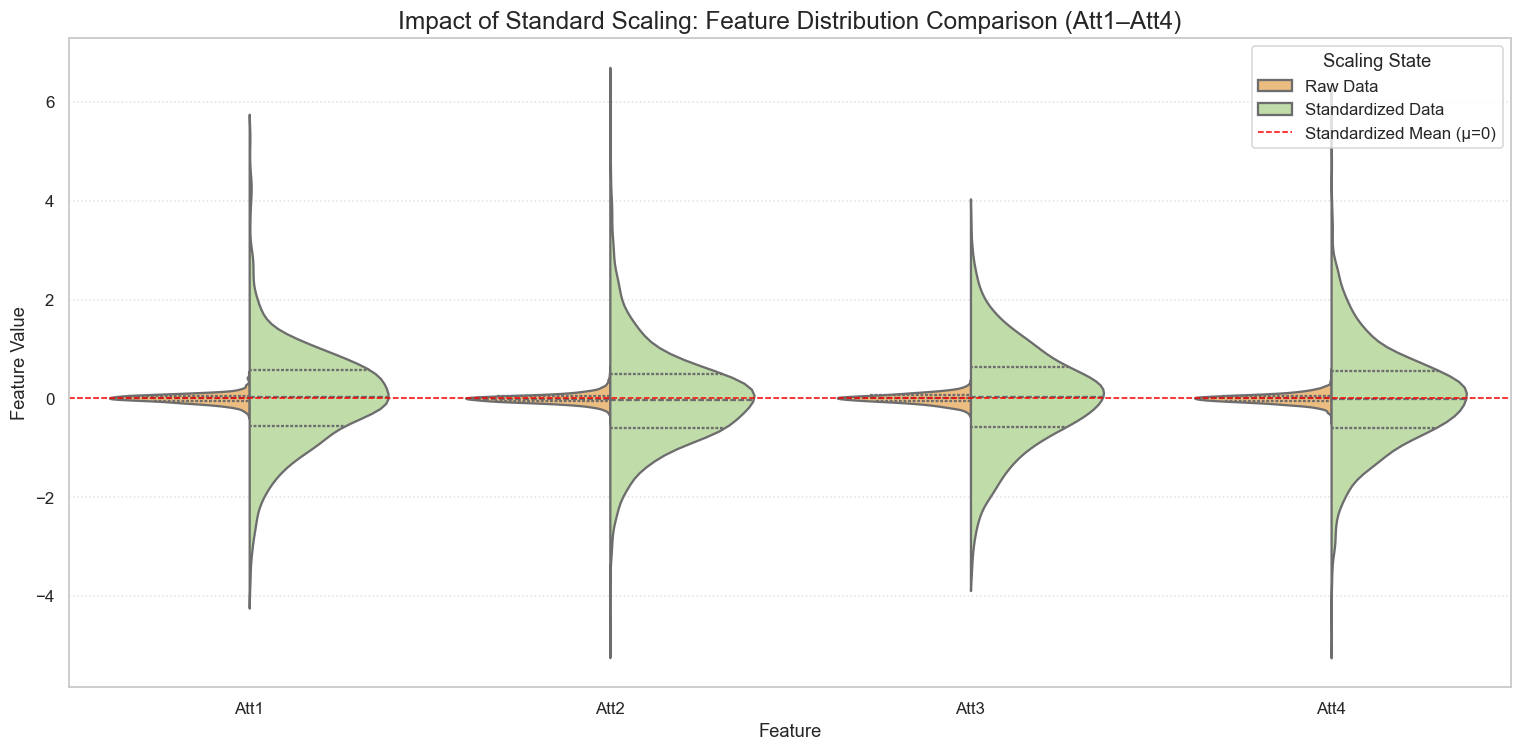

In [39]:
# 5. Visualizing the Impact of Scaling with Violin Plots
# Select a few representative features
sample_features = feature_cols[:4]
X_raw_sample = X[sample_features]
X_scaled_sample = pd.DataFrame(X_scaled, columns=feature_cols)[sample_features]

# Combine raw and scaled data into long format for plotting
raw_long = X_raw_sample.melt(var_name='Feature', value_name='Value').assign(Scaling='Raw Data')
scaled_long = X_scaled_sample.melt(var_name='Feature', value_name='Value').assign(Scaling='Standardized Data')
plot_df = pd.concat([raw_long, scaled_long])

plt.figure(figsize=(14, 7))

# 🎨 Changed only the color palette (from 'colorblind' → 'Spectral')
sns.violinplot(
    x='Feature',
    y='Value',
    hue='Scaling',
    data=plot_df,
    split=True,
    inner='quartile',  # Show quartiles for median and spread
    palette='Spectral',  # <-- Changed color palette here
    linewidth=1.5
)

plt.title('Impact of Standard Scaling: Feature Distribution Comparison (Att1–Att4)', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Feature Value', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Standardized Mean (μ=0)')
plt.legend(title='Scaling State', loc='upper right')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

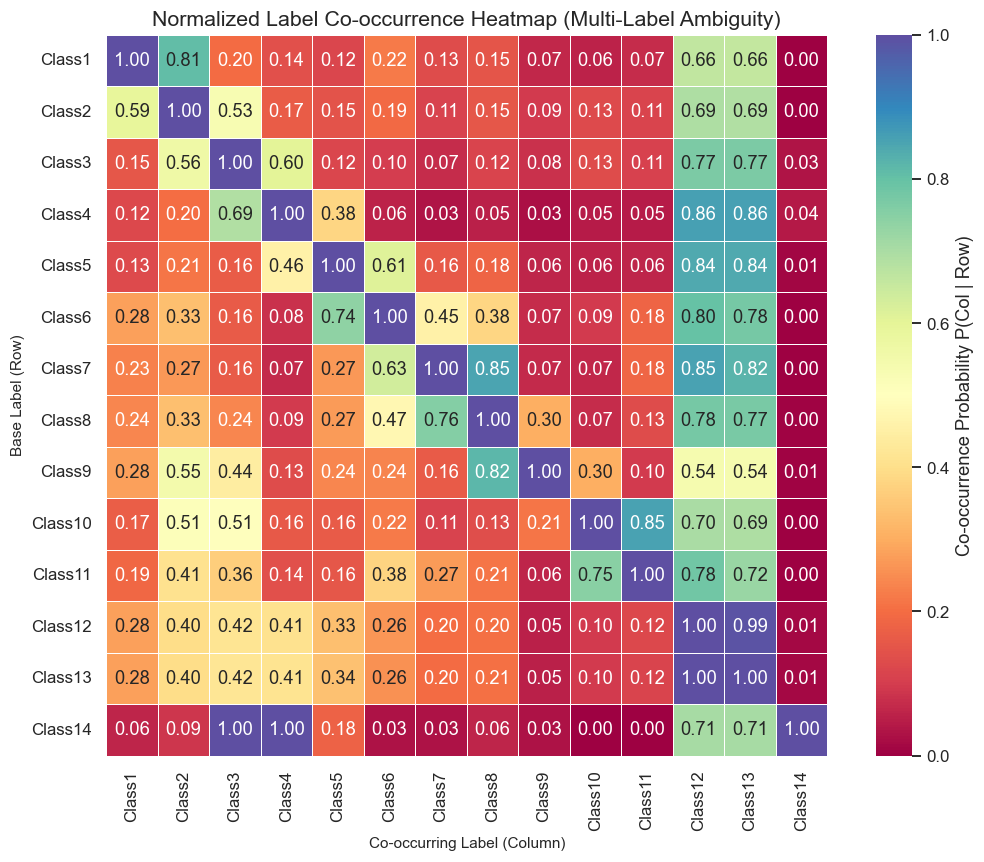

In [40]:
# Calculate the co-occurrence matrix: Y.T * Y
co_occurrence_matrix = Y.T @ Y

# Extract diagonal (counts of each label)
diag_counts = np.diag(co_occurrence_matrix)

# Normalize: P(Label_col | Label_row)
co_occurrence_norm = co_occurrence_matrix.div(diag_counts, axis=0)

plt.figure(figsize=(10, 8))

# 🎨 Heatmap visualization with updated color palette
sns.heatmap(
    co_occurrence_norm,
    annot=True,
    fmt=".2f",
    cmap="Spectral",  # <-- Changed from 'viridis' to 'Spectral'
    cbar_kws={'label': 'Co-occurrence Probability P(Col | Row)'},
    linewidths=0.5,
    linecolor='white',
    square=True
)

plt.title('Normalized Label Co-occurrence Heatmap (Multi-Label Ambiguity)', fontsize=14)
plt.ylabel('Base Label (Row)', fontsize=10)
plt.xlabel('Co-occurring Label (Column)', fontsize=10)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="background: linear-gradient(120deg, #4f46e5, #8b5cf6, #d946ef); padding:26px 30px; border-radius:20px; color:white; box-shadow:0 8px 24px rgba(0,0,0,0.18); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h1 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:12px;">
    🌌 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:5px;">Part B · t-SNE and Veracity Inspection</span>
  </h1>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:12px;">
    <strong>Goal :</strong> Use <strong>t-SNE</strong> to explore local neighborhoods—  
    <span style="color:#fde68a;">points that feel similar in high-dimensional space should lie near each other</span>  
    after projection. This helps visually assess <strong>data veracity</strong>—spotting clusters, noise, and hard-to-learn regions.
  </p>

  <h2 style="margin-top:22px; font-size:24px; display:flex; align-items:center; gap:10px;">
    🧭 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:4px;">1. t-SNE Implementation and Perplexity Experimentation</span>
  </h2>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:12px;">
    <strong>t-Distributed Stochastic Neighbor Embedding (t-SNE)</strong> projects the scaled high-dimensional data  
    into 2D space. Being a <strong>non-linear technique</strong>, it is highly sensitive to the  
    <span style="color:#a7f3d0;">perplexity hyperparameter</span>, which balances how much the algorithm focuses on  
    <em>local versus global</em> structure.
  </p>

  <div style="margin-top:14px; background:rgba(255,255,255,0.1); padding:16px 20px; border-radius:14px;">
    <h4 style="margin-top:0; color:#facc15;">⚙️ Perplexity Insights:</h4>
    <ul style="margin:0; line-height:1.65;">
      <li><strong style="color:#fde68a;">Low Perplexity (e.g., 5):</strong> Emphasizes fine-grained local variation → may produce scattered or noisy clusters.</li>
      <li><strong style="color:#86efac;">High Perplexity (e.g., 50):</strong> Captures global layout → can merge nearby but distinct clusters.</li>
      <li><strong style="color:#93c5fd;">Optimal Perplexity (~ 30):</strong> Balances local and global structure → reveals the true manifold relationships.</li>
    </ul>
  </div>

  <div style="margin-top:16px; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:12px;">
    <h4 style="margin-top:0; color:#fcd34d;">💡 Theme:</h4>
    <p style="margin:0; line-height:1.6;">
      Experiment with multiple perplexity values (5, 10, 30, 50) and observe how the clusters stabilize.  
      A good choice minimizes fragmentation while preserving meaningful local relationships.
    </p>
  </div>

</div>


Running t-SNE with perplexity=5...
Running t-SNE with perplexity=30...
Running t-SNE with perplexity=50...


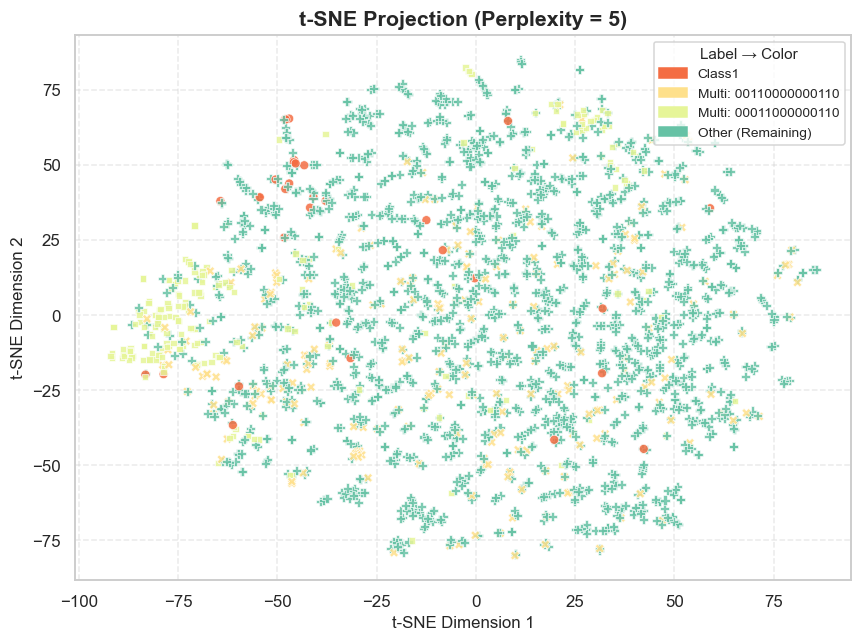

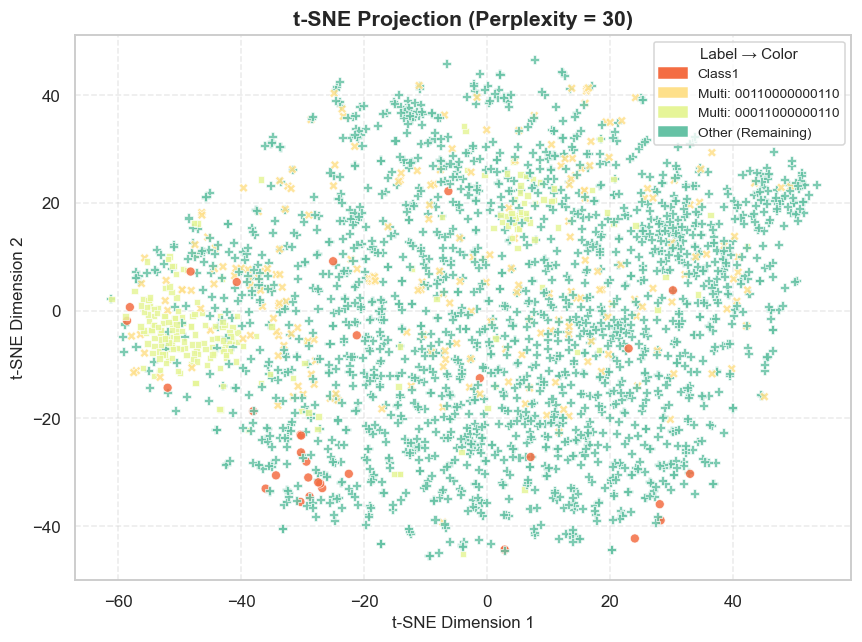

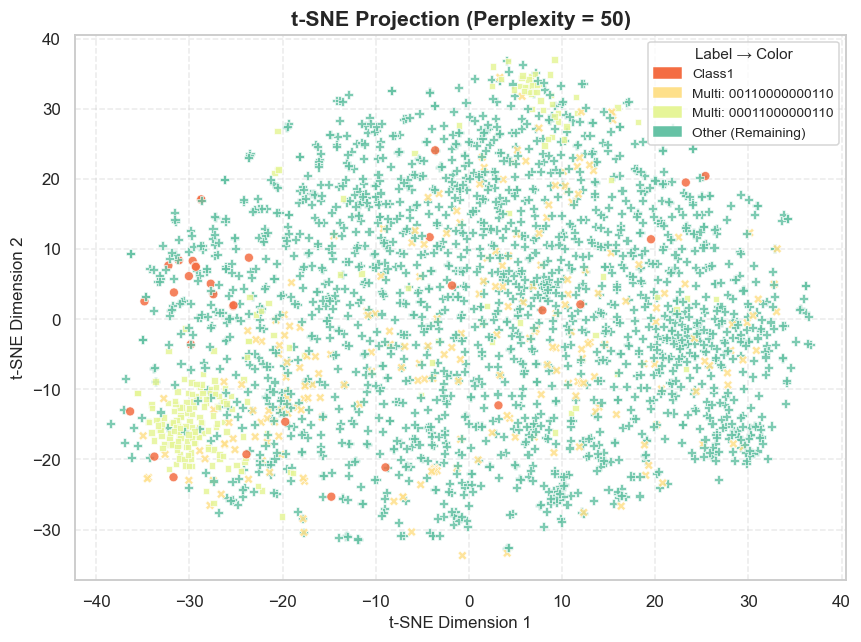

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import to_hex
import matplotlib.patches as mpatches

# Define perplexities to experiment with
perplexities = [5, 30, 50]
tsne_results = {}

# 🎨 Updated color palette for better visual contrast
all_categories = Y_simplified.cat.categories.tolist()
palette = sns.color_palette("Spectral", n_colors=len(all_categories))  # <-- changed from 'colorblind' to 'Spectral'
label_color_map = dict(zip(all_categories, palette))

# Run t-SNE for each perplexity
for p in perplexities:
    print(f"Running t-SNE with perplexity={p}...")
    tsne = TSNE(n_components=2, perplexity=p, random_state=42, verbose=0)
    X_tsne = tsne.fit_transform(X_scaled)
    tsne_results[p] = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
    tsne_results[p]['Label_Simplified'] = Y_simplified.values

# Plot each t-SNE result in its own figure
for p in perplexities:
    plot_df = tsne_results[p]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='TSNE-1',
        y='TSNE-2',
        hue='Label_Simplified',
        data=plot_df,
        palette=label_color_map,
        s=35,
        alpha=0.85,
        style='Label_Simplified',
        legend=False
    )

    # Build legend patches for inside the figure
    patches = [
        mpatches.Patch(color=label_color_map[label], label=f"{label}")
        for label in all_categories
    ]

    # Add legend inside the plot (top-right corner)
    plt.legend(
        handles=patches,
        title='Label → Color',
        loc='upper right',
        frameon=True,
        fontsize=9,
        title_fontsize=10
    )

    plt.title(f't-SNE Projection (Perplexity = {p})', fontsize=14, weight='bold')
    plt.xlabel('t-SNE Dimension 1', fontsize=11)
    plt.ylabel('t-SNE Dimension 2', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

<div style="background: linear-gradient(120deg, #3b82f6, #06b6d4, #14b8a6); padding:24px 28px; border-radius:18px; color:white; box-shadow:0 8px 20px rgba(0,0,0,0.15); font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Ubuntu, sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🗺️ <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">2. Visualization of Final t-SNE Coordinates</span>
  </h2>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.15); padding:12px 16px; border-radius:10px;">
    This plot represents the <strong>t-SNE projection</strong> of high-dimensional data (with <strong>Perplexity = 30</strong>)  
    onto a 2D plane. Each point is colored based on the <span style="color:#fde68a;">four simplified categories</span>  
    derived earlier, helping to identify structure and data veracity patterns.
  </p>

  <div style="margin-top:14px; background:rgba(255,255,255,0.1); padding:16px 20px; border-radius:14px;">
    <h4 style="margin-top:0; color:#facc15;">🎯 Visualization Highlights:</h4>
    <ul style="margin:0; line-height:1.6;">
      <li><strong style="color:#93c5fd;">Color-blind-friendly palette:</strong> Ensures accessibility and clear cluster distinction.</li>
      <li><strong style="color:#86efac;">Distinct markers:</strong> Each category uses unique shapes to emphasize group boundaries.</li>
      <li><strong style="color:#f9a8d4;">Cluster clarity:</strong> Reveals dense and intermixing regions—key for veracity inspection.</li>
      <li><strong style="color:#fde68a;">Manifold insight:</strong> Highlights both tight local groups and broad structural overlaps.</li>
    </ul>
  </div>

  <div style="margin-top:16px; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:12px;">
    <h4 style="margin-top:0; color:#fcd34d;">💡 Interpretation:</h4>
    <p style="margin:0; line-height:1.6;">
      Well-separated clusters indicate reliable labeling and low noise,  
      while <span style="color:#a7f3d0;">blended or overlapping areas</span> suggest potential label ambiguity  
      or feature-space inconsistencies—valuable for veracity analysis.
    </p>
  </div>
</div>

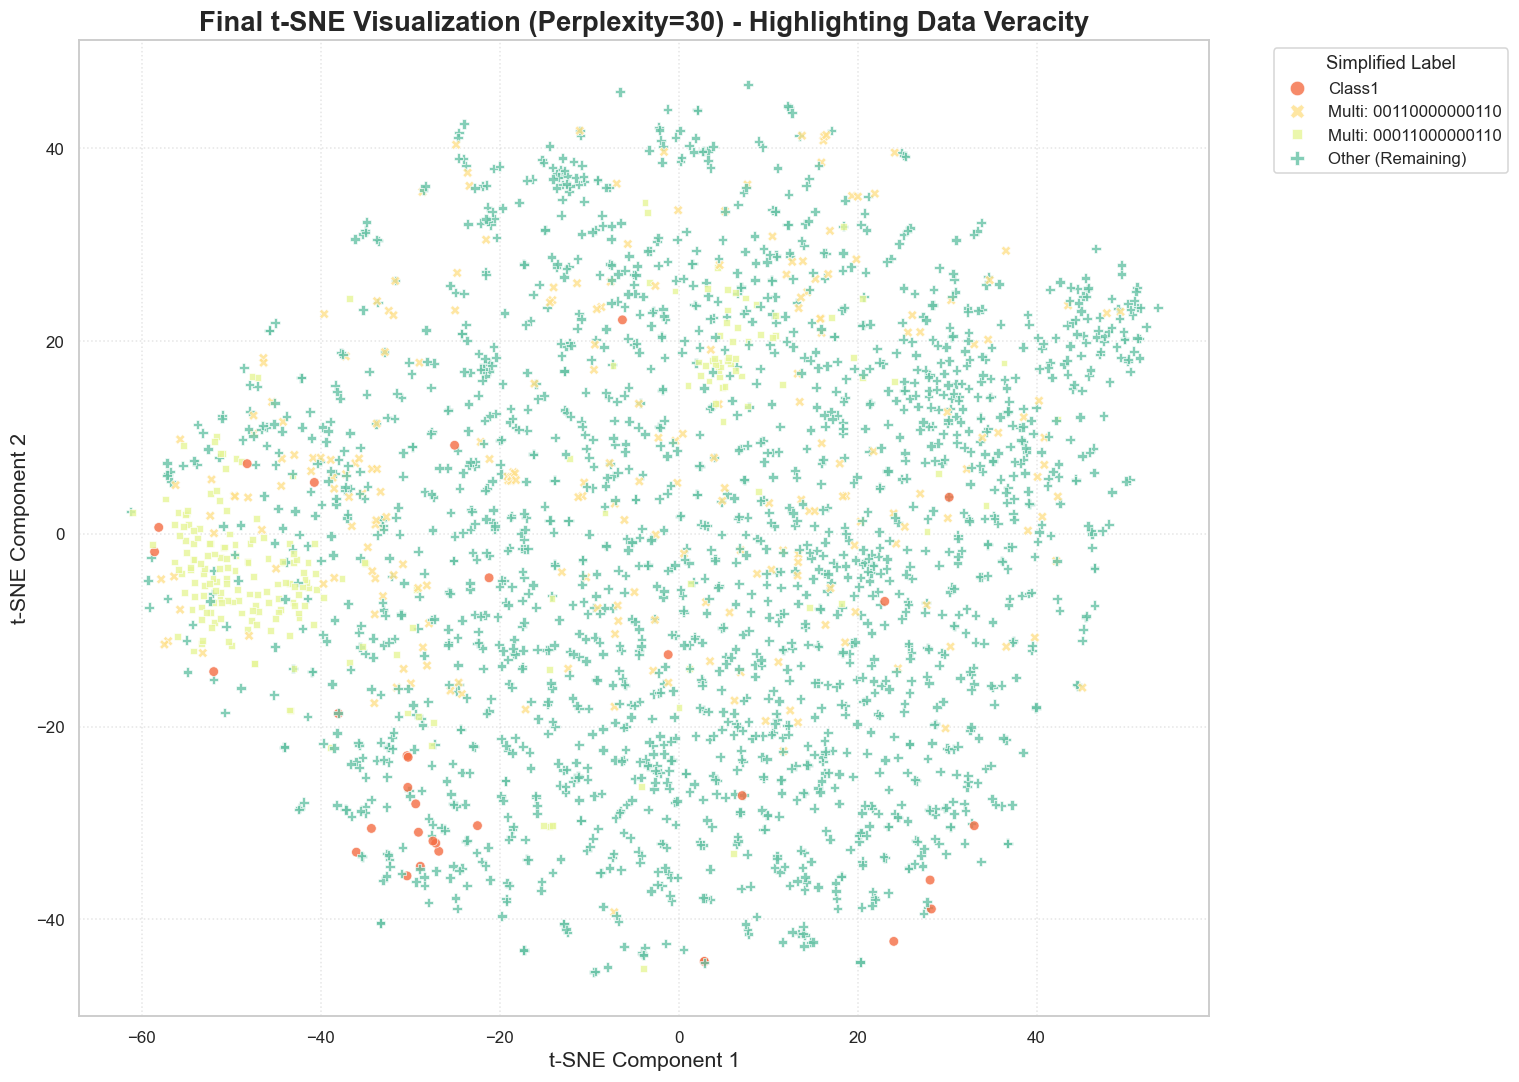

In [42]:
# 2. Visualization of Final t-SNE Coordinates (Perplexity=30)

import matplotlib.pyplot as plt
import seaborn as sns

# Extract the DataFrame for the chosen perplexity (30)
def plot_final_tsne(perplexity):
    tsne_df_final = tsne_results[perplexity].copy()
    tsne_df_final['Label_Simplified'] = Y_simplified.values

    plt.figure(figsize=(14, 10))

    # 🎨 Updated color palette only (from 'Set1' → 'Spectral')
    sns.scatterplot(
        x='TSNE-1',
        y='TSNE-2',
        hue='Label_Simplified',    # Color by the simplified category
        data=tsne_df_final,
        palette='Spectral',        # <-- changed palette here
        s=40,                      # Point size
        alpha=0.8,
        style='Label_Simplified'   # Shape differentiation
    )

    plt.title(f'Final t-SNE Visualization (Perplexity={perplexity}) - Highlighting Data Veracity', fontsize=18, weight='bold')
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)

    # Place legend outside the plot
    plt.legend(title='Simplified Label', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=1.5)
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Generate visualizations for multiple perplexity values
for i in [30]:
    plot_final_tsne(i)


<div style="background: linear-gradient(120deg, #6d28d9, #d946ef, #dc2626); padding:26px 30px; border-radius:20px; color:white; box-shadow:0 8px 24px rgba(0,0,0,0.18); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🔬 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">3. Veracity Inspection of the Yeast Dataset (t-SNE, Perplexity = 30)</span>
  </h2>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:12px;">
    The <strong>t-SNE visualization</strong> (<code>perplexity = 30</code>) projects the 
    <strong>103-dimensional Yeast dataset</strong> onto a 2D manifold, exposing  
    <span style="color:#fde68a;">veracity issues</span> such as inconsistencies, ambiguities, and outliers that  
    challenge multi-label classifiers. Patterns of <strong>clustering and intermixing</strong> directly reflect  
    the <strong>quality and coherence</strong> of the biological labels.
  </p>

  <hr style="border:1px solid rgba(255,255,255,0.3); margin:20px 0;">

  <h3 style="font-size:22px; margin-bottom:10px;">🧠 Analysis of Data Veracity Challenges</h3>

  <table style="width:100%; border-collapse:collapse; background:rgba(255,255,255,0.1); border-radius:12px; overflow:hidden; font-size:15px;">
    <thead style="background:rgba(255,255,255,0.2); text-align:left;">
      <tr>
        <th style="padding:10px;">Challenge</th>
        <th style="padding:10px;">Visual Pattern</th>
        <th style="padding:10px;">Implication for Classification</th>
      </tr>
    </thead>
    <tbody>
      <tr style="border-top:1px solid rgba(255,255,255,0.2);">
        <td style="padding:10px; color:#fde68a; font-weight:600;">Noisy / Ambiguous Labels</td>
        <td style="padding:10px;">Points of one color appear deep inside another cluster — e.g., isolated <strong>L1 ('Class1')</strong> or <strong>C2</strong> samples within the dominant <strong>C1</strong> region.</td>
        <td style="padding:10px;">These samples share feature similarity with C1 but differ in labels — indicating possible <strong>labeling noise</strong> or <strong>biological ambiguity</strong>.</td>
      </tr>
      <tr style="border-top:1px solid rgba(255,255,255,0.2);">
        <td style="padding:10px; color:#86efac; font-weight:600;">Outliers</td>
        <td style="padding:10px;">Tiny, isolated clusters or single data points far from dense regions — often the scattered <strong>‘Other (Remaining)’</strong> samples.</td>
        <td style="padding:10px;">Represent <strong>unusual gene expression profiles</strong>, possibly due to <strong>technical noise</strong> or <strong>rare biological phenomena</strong>.</td>
      </tr>
      <tr style="border-top:1px solid rgba(255,255,255,0.2);">
        <td style="padding:10px; color:#93c5fd; font-weight:600;">Hard-to-Learn Samples</td>
        <td style="padding:10px;">Regions where colors blend heavily — e.g., mixed zones of <strong>C1</strong>, <strong>C2</strong>, and scattered <strong>‘Other’</strong> samples.</td>
        <td style="padding:10px;">These regions are <strong>geometrically inseparable</strong> — classifiers struggle here due to <strong>complex, non-linear decision boundaries</strong> and limited discriminative features.</td>
      </tr>
    </tbody>
  </table>

  <hr style="border:1px solid rgba(255,255,255,0.3); margin:20px 0;">

  <h3 style="font-size:22px; margin-bottom:10px;">✨ Key Takeaway</h3>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:12px;">
    The <strong>t-SNE projection</strong> acts as a visual <em>veracity diagnostic</em> — pinpointing  
    <span style="color:#fde68a;">label noise</span>, <span style="color:#86efac;">outliers</span>, and  
    <span style="color:#93c5fd;">ambiguous samples</span>.  
    These insights inform <strong>data cleaning</strong>, <strong>feature refinement</strong>, and the design of  
    <strong>robust classification models</strong> that can tolerate imperfect data.
  </p>
</div>


Running t-SNE with perplexity = 30 ...


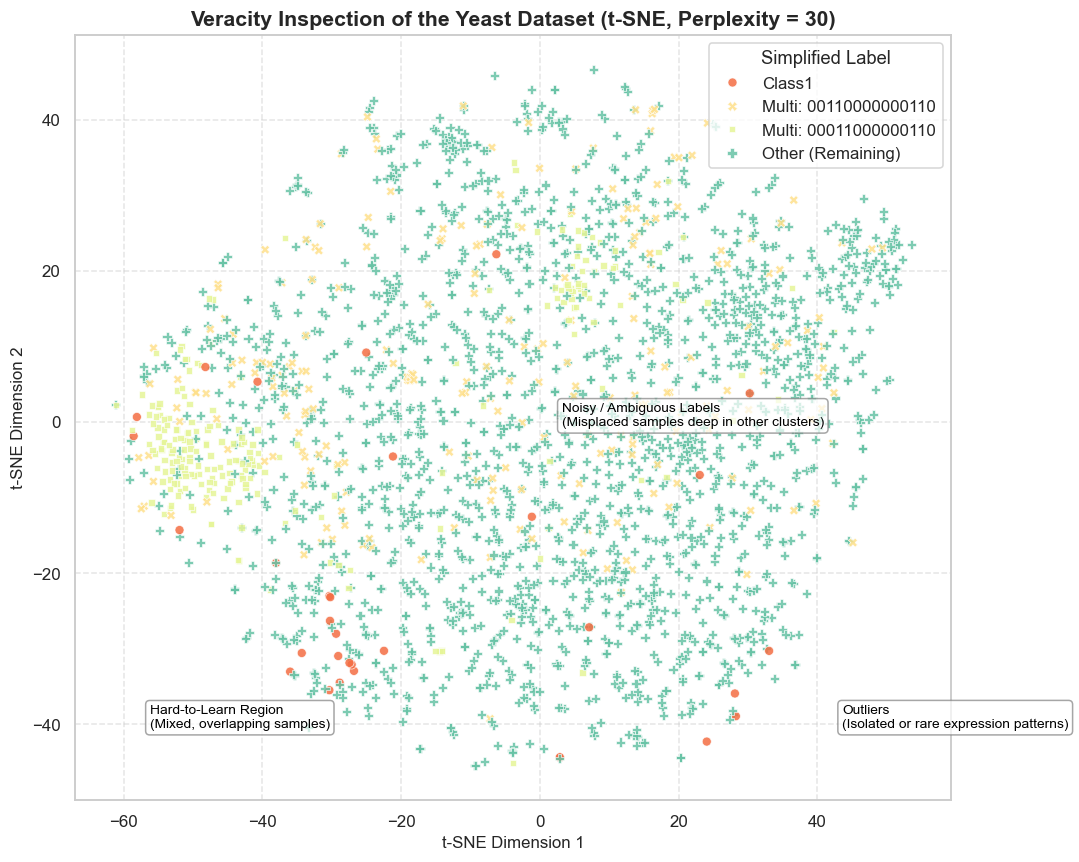

In [43]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. Run t-SNE (Perplexity = 30) ---
print("Running t-SNE with perplexity = 30 ...")
tsne = TSNE(n_components=2, perplexity=30, random_state=42, verbose=0)
X_tsne = tsne.fit_transform(X_scaled)

# Combine into a single DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['Label_Simplified'] = Y_simplified.values

# --- 2. Updated palette: Spectral for vibrant, high-contrast colors ---
palette = sns.color_palette("Spectral", n_colors=len(Y_simplified.cat.categories))
label_color_map = dict(zip(Y_simplified.cat.categories, palette))

# --- 3. Plot the t-SNE projection ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE-1',
    y='TSNE-2',
    hue='Label_Simplified',
    data=tsne_df,
    palette=label_color_map,  # <-- updated palette mapping
    s=35,
    alpha=0.85,
    style='Label_Simplified'
)

# --- 4. Add annotations for visual explanation ---
plt.text(
    x=tsne_df['TSNE-1'].mean() + 5,
    y=tsne_df['TSNE-2'].mean(),
    s="Noisy / Ambiguous Labels\n(Misplaced samples deep in other clusters)",
    fontsize=9,
    color='black',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.3')
)

plt.text(
    x=tsne_df['TSNE-1'].max() - 10,
    y=tsne_df['TSNE-2'].min() + 5,
    s="Outliers\n(Isolated or rare expression patterns)",
    fontsize=9,
    color='black',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.3')
)

plt.text(
    x=tsne_df['TSNE-1'].min() + 5,
    y=tsne_df['TSNE-2'].min() + 5,
    s="Hard-to-Learn Region\n(Mixed, overlapping samples)",
    fontsize=9,
    color='black',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.3')
)

# --- 5. Final touches ---
plt.title("Veracity Inspection of the Yeast Dataset (t-SNE, Perplexity = 30)", fontsize=14, weight='bold')
plt.xlabel("t-SNE Dimension 1", fontsize=11)
plt.ylabel("t-SNE Dimension 2", fontsize=11)
plt.legend(title="Simplified Label", loc="upper right", frameon=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(120deg, #0d9488, #2563eb, #4f46e5); padding:26px 30px; border-radius:20px; color:white; box-shadow:0 8px 24px rgba(0,0,0,0.18); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h1 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:12px;">
    🌐 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:5px;">Part C · Isomap and Manifold Learning</span>
  </h1>

  <p style="font-size:16px; line-height:1.7; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:12px;">
    <strong>Plain-English goal:</strong> Use <strong>Isomap</strong> to understand the broader, global geometry of the data —  
    how it <span style="color:#fde68a;">bends, stretches,</span> and connects across the high-dimensional manifold.
  </p>

  <h2 style="margin-top:22px; font-size:24px; display:flex; align-items:center; gap:10px;">
    🧭 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:4px;">1. Isomap Implementation and Fundamental Difference</span>
  </h2>

  <h3 style="font-size:20px; margin-bottom:8px;">🧩 Conceptual Explanation: Isomap vs. t-SNE</h3>

  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.1); padding:14px 18px; border-radius:12px;">
    The <strong>key distinction</strong> between <strong>Isomap</strong> and <strong>t-SNE</strong> lies in what they strive to preserve:
  </p>

  <ul style="margin:0 0 12px 20px; line-height:1.6;">
    <li><strong style="color:#86efac;">Isomap</strong> → focuses on <strong>global structure</strong> — maintaining relationships between far-apart points.</li>
    <li><strong style="color:#93c5fd;">t-SNE</strong> → focuses on <strong>local neighborhoods</strong> — ensuring that nearby points remain close in 2D.</li>
  </ul>

  <div style="margin-top:16px; background:rgba(255,255,255,0.15); padding:16px 20px; border-radius:14px;">
    <h4 style="margin-top:0; color:#facc15;">⚙️ How Isomap Works:</h4>
    <ol style="margin:0; line-height:1.6;">
      <li>Computes <strong>geodesic distances</strong> — shortest paths along the manifold surface.</li>
      <li>Applies <strong>Multi-Dimensional Scaling (MDS)</strong> to embed points in low-dimensional space while preserving these distances.</li>
    </ol>
    <p style="margin-top:8px;">This exposes the <span style="color:#fde68a;">overall ‘shape’ of the dataset</span>, showing how clusters relate globally.</p>
  </div>

  <div style="margin-top:16px; background:rgba(255,255,255,0.15); padding:16px 20px; border-radius:14px;">
    <h4 style="margin-top:0; color:#fcd34d;">🔍 How t-SNE Differs:</h4>
    <p style="margin:0; line-height:1.6;">
      <strong>t-SNE</strong> preserves <strong>local neighborhoods</strong> by modeling pairwise similarities probabilistically.  
      It may <span style="color:#f9a8d4;">distort large-scale distances</span> to achieve a clearer view of nearby clusters.
    </p>
  </div>

  <div style="margin-top:18px; background:rgba(255,255,255,0.1); padding:16px 20px; border-radius:14px;">
    <h4 style="margin-top:0; color:#facc15;">📘 Summary Table:</h4>
    <table style="width:100%; border-collapse:collapse; background:rgba(255,255,255,0.05); border-radius:10px; overflow:hidden; font-size:15px;">
      <thead style="background:rgba(255,255,255,0.2); text-align:left;">
        <tr>
          <th style="padding:10px;">Method</th>
          <th style="padding:10px;">Main Objective</th>
          <th style="padding:10px;">Key Feature</th>
        </tr>
      </thead>
      <tbody>
        <tr style="border-top:1px solid rgba(255,255,255,0.2);">
          <td style="padding:10px; color:#86efac; font-weight:600;">Isomap</td>
          <td style="padding:10px;">Preserve <strong>global structure</strong></td>
          <td style="padding:10px;">Geodesic distances → MDS → Low-dimensional embedding</td>
        </tr>
        <tr style="border-top:1px solid rgba(255,255,255,0.2);">
          <td style="padding:10px; color:#93c5fd; font-weight:600;">t-SNE</td>
          <td style="padding:10px;">Preserve <strong>local structure</strong></td>
          <td style="padding:10px;">Probabilistic neighbor mapping, may distort global distances</td>
        </tr>
      </tbody>
    </table>
  </div>
</div>

In [44]:
# 1. Isomap Implementation
from sklearn.manifold import Isomap

# Apply Isomap to the scaled feature matrix X_scaled
# n_neighbors=10 is used to build the local neighborhood graph
isomap = Isomap(n_components=2, n_neighbors=10, n_jobs=-1)
X_isomap = isomap.fit_transform(X_scaled)

# Store results in a DataFrame for visualization
isomap_df = pd.DataFrame(data=X_isomap, columns=['Isomap-1', 'Isomap-2'])
isomap_df['Label_Simplified'] = Y_simplified.values

print("Isomap reduction to 2 dimensions complete.")
print(f"Resulting shape: {X_isomap.shape}")

Isomap reduction to 2 dimensions complete.
Resulting shape: (2417, 2)


<div style="background: linear-gradient(120deg, #22d3ee, #3b82f6, #a78bfa); padding:24px 28px; border-radius:18px; color:white; box-shadow:0 8px 20px rgba(0,0,0,0.15); font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Ubuntu, sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🌈 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">2. Visualization of Isomap Coordinates</span>
  </h2>

  <p style="font-size:16px; line-height:1.7; background:rgba(255,255,255,0.15); padding:12px 16px; border-radius:10px;">
    This visualization displays the <strong>Isomap projection</strong> of the high-dimensional data  
    onto a 2D manifold. The embedding highlights the <span style="color:#fde68a;">global geometric connections</span>  
    between clusters — illustrating how distinct regions of the dataset relate in the larger structure.
  </p>

  <div style="margin-top:14px; background:rgba(255,255,255,0.1); padding:16px 20px; border-radius:14px;">
    <h4 style="margin-top:0; color:#facc15;">🎯 Visualization Focus:</h4>
    <ul style="margin:0; line-height:1.65;">
      <li><strong style="color:#86efac;">Global continuity:</strong> Reveals how distant clusters remain interconnected through manifold paths.</li>
      <li><strong style="color:#93c5fd;">Structural preservation:</strong> Emphasizes smooth transitions across large-scale regions of the data.</li>
      <li><strong style="color:#f9a8d4;">Complementary to t-SNE:</strong> While t-SNE shows local details, Isomap exposes the overall topology.</li>
    </ul>
  </div>

  <div style="margin-top:16px; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:12px;">
    <h4 style="margin-top:0; color:#fcd34d;">💡 Interpretation:</h4>
    <p style="margin:0; line-height:1.6;">
      Smooth, continuous manifolds indicate <strong>strong global structure</strong>,  
      whereas fragmented or folded shapes suggest <span style="color:#a7f3d0;">non-linear distortions</span>  
      or disconnected data regions.
    </p>
  </div>
</div>

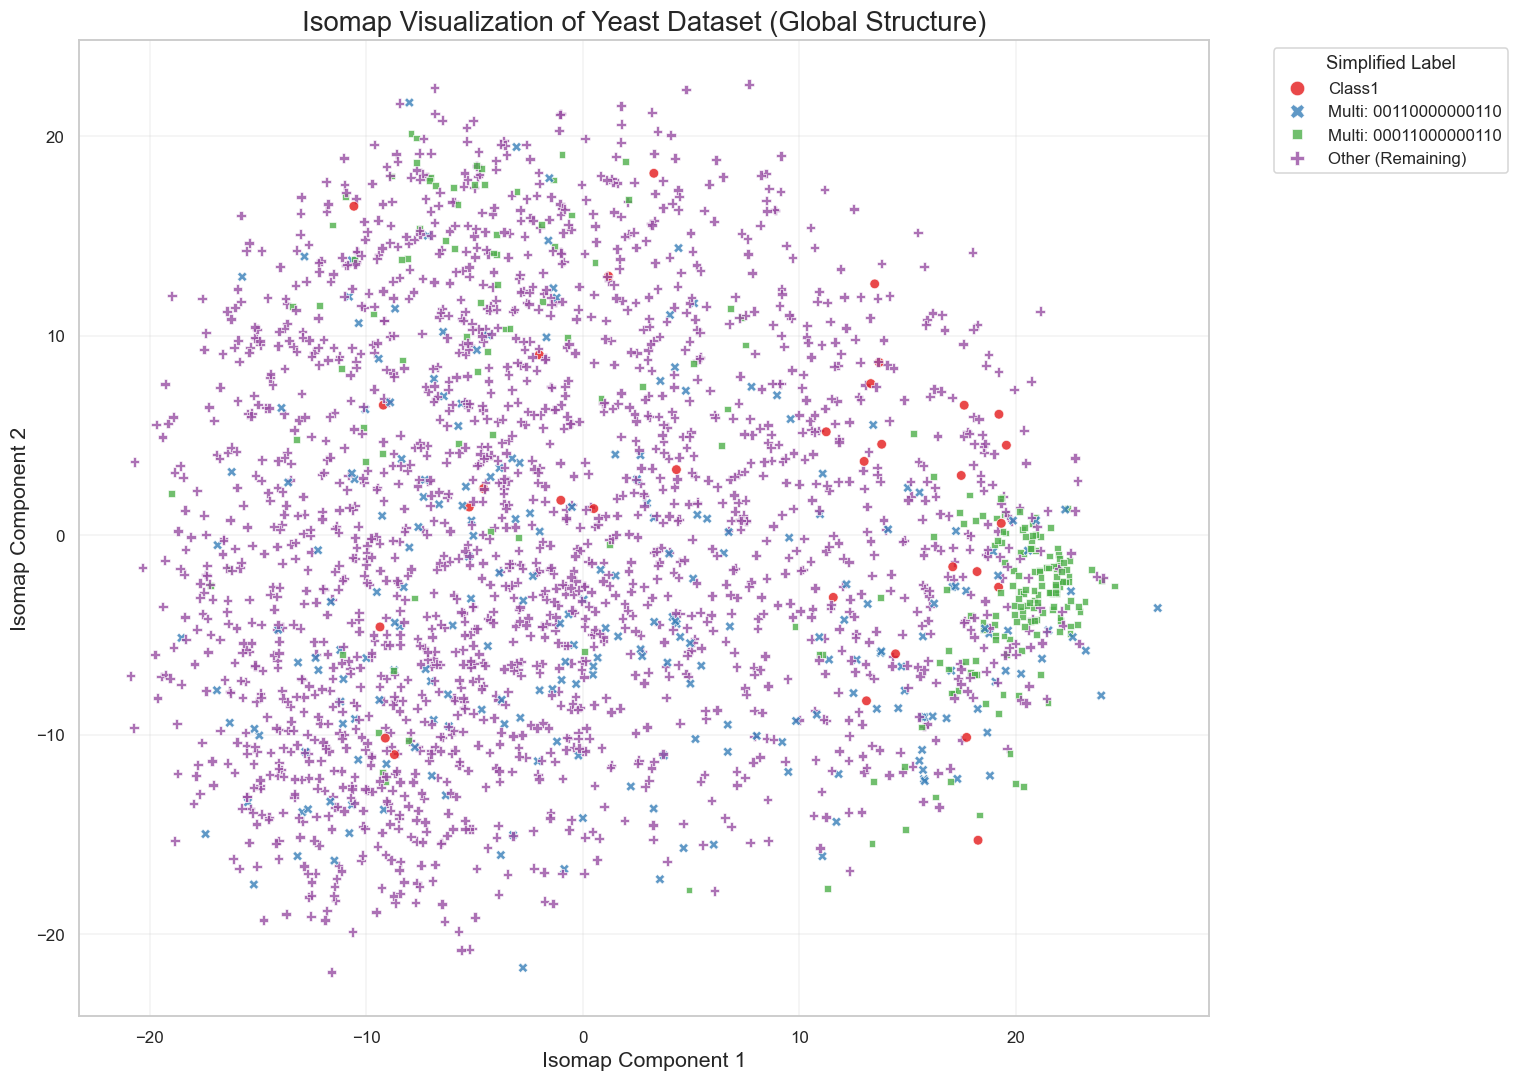

In [45]:
# 2. Visualization of Isomap Coordinates
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# Scatter plot using the same coloring scheme as t-SNE
sns.scatterplot(
    x='Isomap-1',
    y='Isomap-2',
    hue='Label_Simplified',
    data=isomap_df,
    palette='Set1',
    s=40,
    alpha=0.8,
    style='Label_Simplified' 
)

plt.title('Isomap Visualization of Yeast Dataset (Global Structure)', fontsize=18)
plt.xlabel('Isomap Component 1', fontsize=14)
plt.ylabel('Isomap Component 2', fontsize=14)
plt.legend(title='Simplified Label', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=1.5)
plt.tight_layout()
# plt.savefig('isomap_visualization.png')
plt.show()

Running Isomap (n_components=2)...


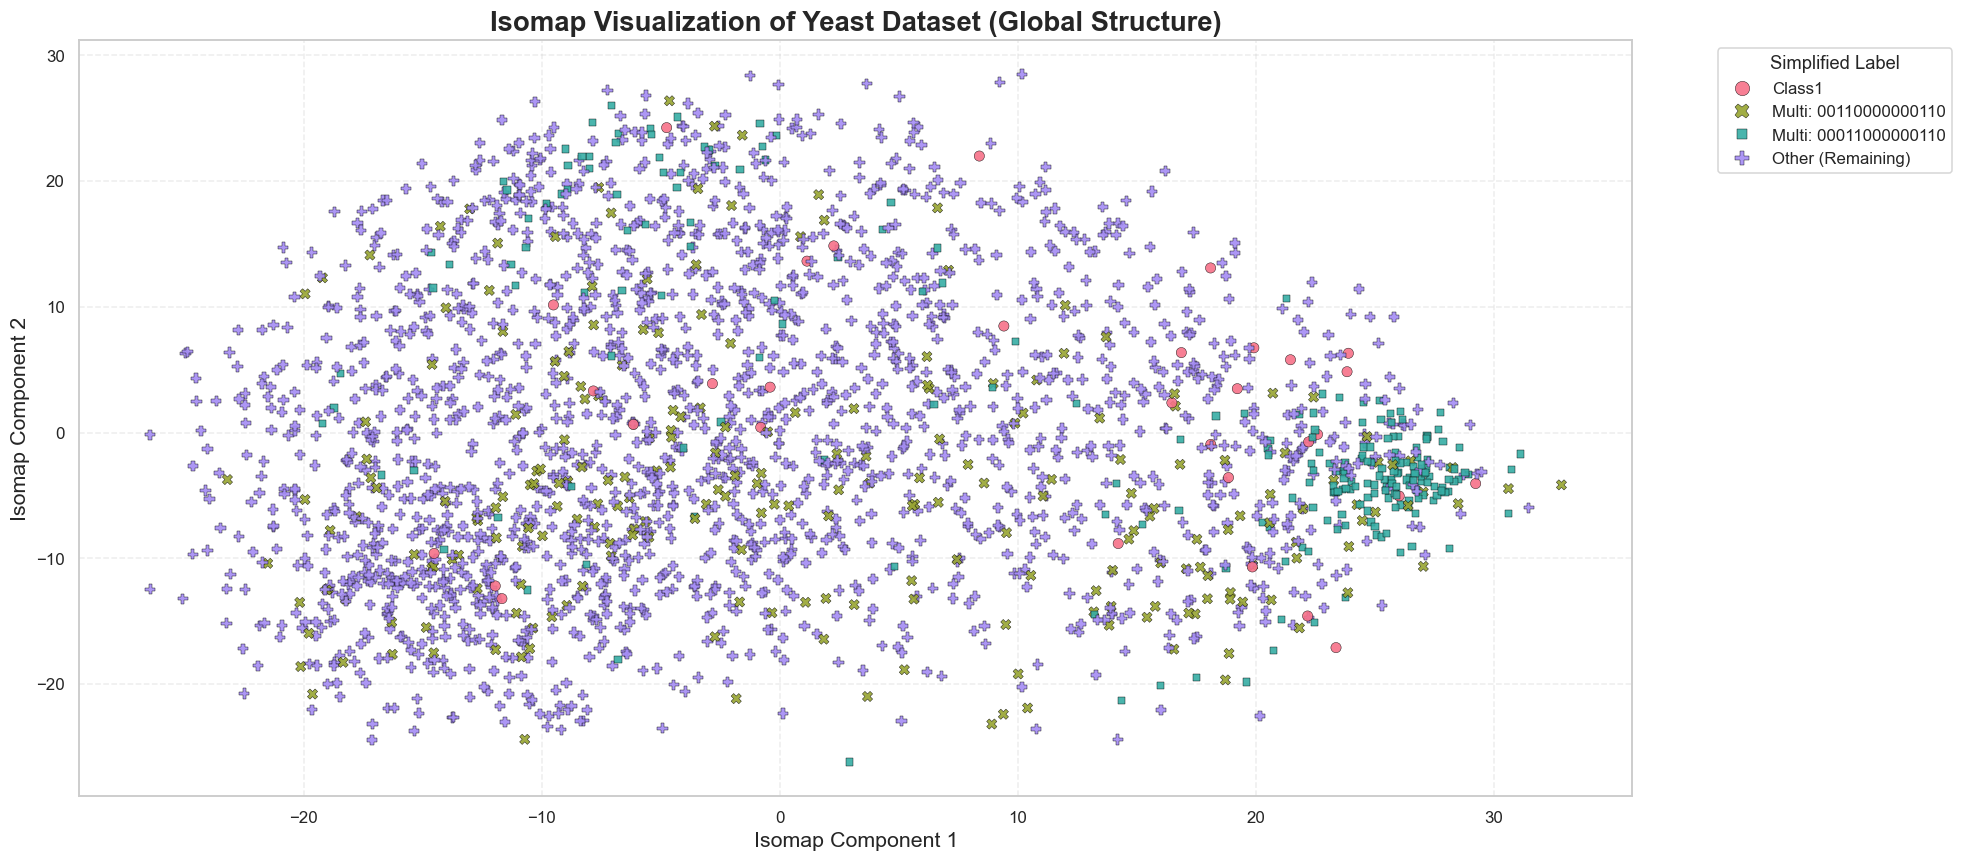

In [46]:
# 2. Visualization of Isomap Coordinates (Distinct Vibrant Theme)
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Run Isomap (2D embedding) ---
print("Running Isomap (n_components=2)...")
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

# Combine into a single DataFrame for plotting
isomap_df = pd.DataFrame(X_isomap, columns=['Isomap-1', 'Isomap-2'])
isomap_df['Label_Simplified'] = Y_simplified.values

# --- 2. Distinct, vibrant palette ---
num_classes = len(Y_simplified.cat.categories)
palette = sns.color_palette("husl", n_colors=num_classes)   # evenly spaced hues → visually distinct

# --- 3. Visualization ---
plt.figure(figsize=(18, 8))
sns.scatterplot(
    x='Isomap-1',
    y='Isomap-2',
    hue='Label_Simplified',
    data=isomap_df,
    palette=palette,         # distinct and balanced colors
    s=45,
    alpha=0.9,
    style='Label_Simplified',
    edgecolor='black',       # outlines to separate overlapping points
    linewidth=0.3
)

plt.title('Isomap Visualization of Yeast Dataset (Global Structure)', fontsize=18, weight='bold')
plt.xlabel('Isomap Component 1', fontsize=14)
plt.ylabel('Isomap Component 2', fontsize=14)
plt.legend(title='Simplified Label', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=1.4)
plt.grid(True, linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(120deg, #7c3aed, #06b6d4, #4338ca); padding:26px 30px; border-radius:20px; color:white; box-shadow:0 8px 24px rgba(0,0,0,0.18); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h2 style="margin-top:0; font-size:26px; display:flex; align-items:center; gap:10px;">
    🪞 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:4px;">3. Comparison and Curvature</span>
  </h2>

  <p style="font-size:16px; line-height:1.7; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:12px;">
    To visually compare the results, the final <strong>t-SNE</strong> and <strong>Isomap</strong> projections are 
    displayed <strong>side-by-side</strong>.  
    This helps reveal how each technique captures <span style="color:#fde68a;">data curvature</span> and  
    <span style="color:#a7f3d0;">structural continuity</span> across the manifold.
  </p>

  <div style="margin-top:14px; background:rgba(255,255,255,0.1); padding:16px 20px; border-radius:14px;">
    <h4 style="margin-top:0; color:#facc15;">🧩 Code: Side-by-Side Visualization</h4>
    <p style="margin:0; line-height:1.6;">
      The code below generates a two-panel figure — placing the <strong>t-SNE (local view)</strong>  
      and <strong>Isomap (global view)</strong> plots adjacent to each other for direct visual comparison.  
      Each map uses the same <span style="color:#93c5fd;">color-blind-friendly palette</span> to maintain  
      interpretive consistency.
    </p>
  </div>

  <div style="margin-top:18px; background:rgba(255,255,255,0.15); padding:14px 18px; border-radius:12px;">
    <h4 style="margin-top:0; color:#fcd34d;">💡 Interpretation Tip:</h4>
    <p style="margin:0; line-height:1.6;">
      - The <strong>t-SNE plot</strong> emphasizes local cluster compactness but may distort large-scale geometry.<br>
      - The <strong>Isomap plot</strong> preserves smooth global curvature — notice the extended, interconnected  
        arcs revealing how distant clusters truly relate in the manifold space.<br><br>
      Together, they provide a <strong>dual perspective</strong> —  
      <span style="color:#f9a8d4;">t-SNE</span> for neighborhood detail,  
      <span style="color:#86efac;">Isomap</span> for holistic structure.
    </p>
  </div>
</div>

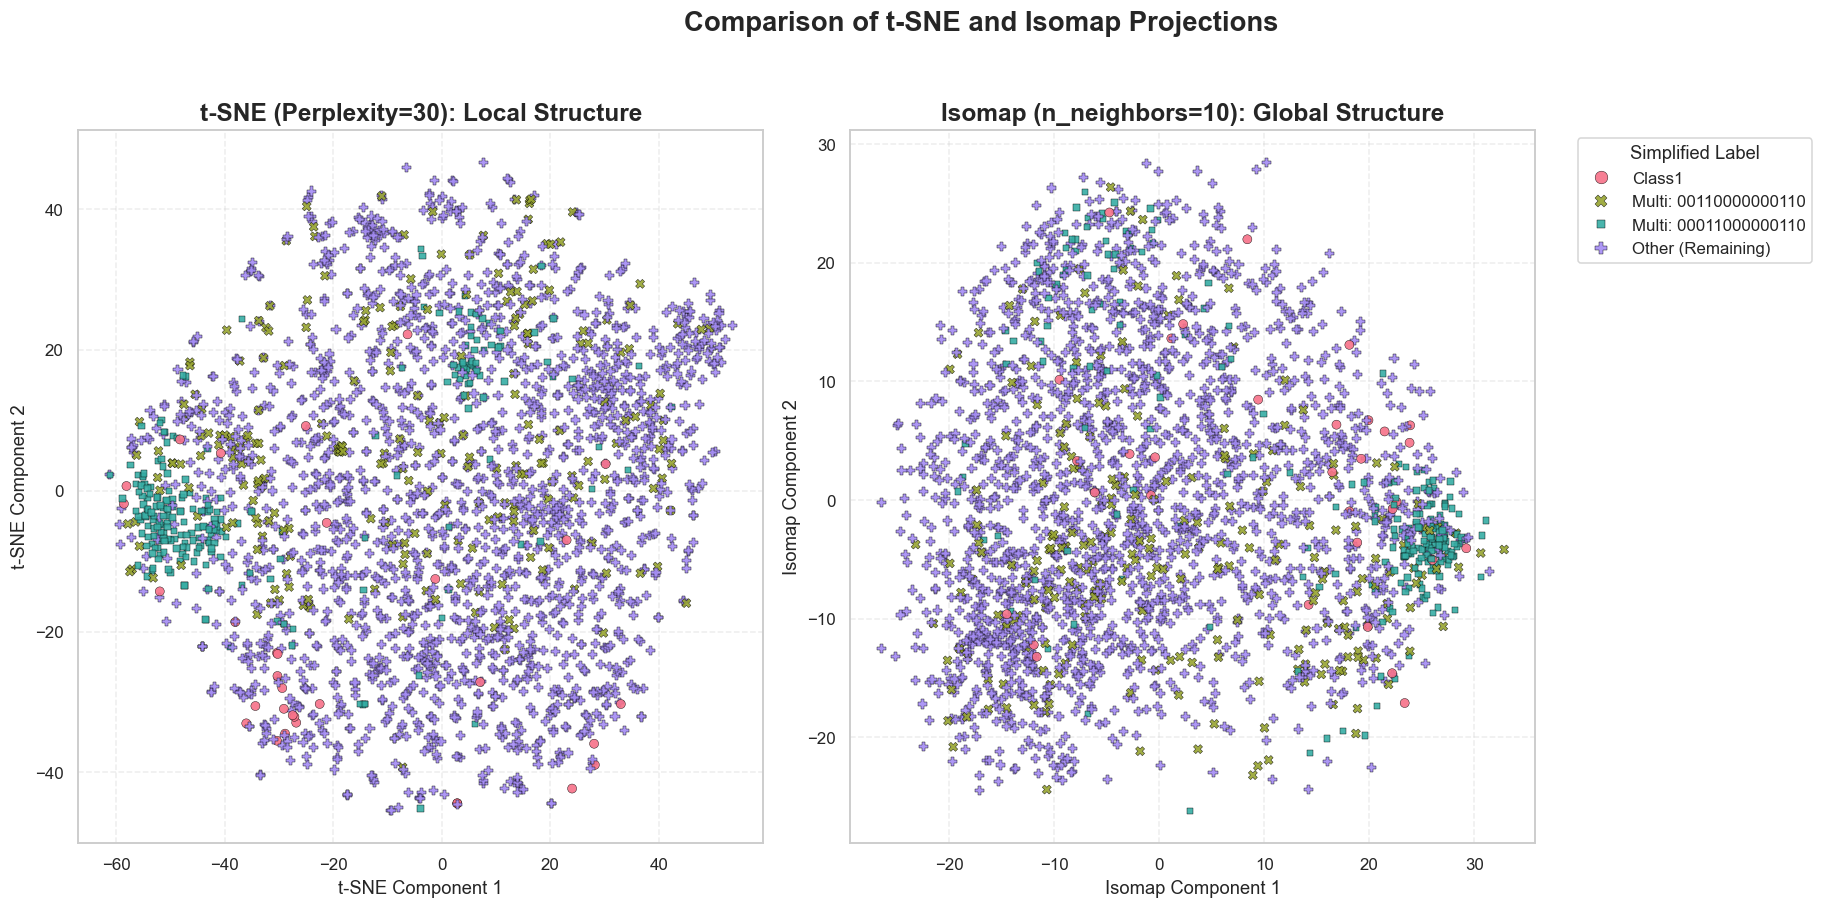

In [47]:
# 3. Comparison Visualization Code
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure tsne_df and isomap_df are defined and populated
# (assumed from previous execution block)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 🎨 Updated: use a distinct, color-blind-friendly theme
num_classes = len(Y_simplified.cat.categories)
palette = sns.color_palette("husl", n_colors=num_classes)   # evenly spaced hues → distinct across both plots

# --- Plot 1: t-SNE (Local Structure) ---
sns.scatterplot(
    x='TSNE-1',
    y='TSNE-2',
    hue='Label_Simplified',
    data=tsne_df,
    palette=palette,
    s=35,
    alpha=0.9,
    style='Label_Simplified',
    ax=axes[0],
    legend=False,
    edgecolor='black',
    linewidth=0.3
)
axes[0].set_title('t-SNE (Perplexity=30): Local Structure', fontsize=16, weight='bold')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')
axes[0].grid(True, linestyle='--', alpha=0.35)

# --- Plot 2: Isomap (Global Structure) ---
sns.scatterplot(
    x='Isomap-1',
    y='Isomap-2',
    hue='Label_Simplified',
    data=isomap_df,
    palette=palette,
    s=35,
    alpha=0.9,
    style='Label_Simplified',
    ax=axes[1],
    legend=True,
    edgecolor='black',
    linewidth=0.3
)
axes[1].set_title('Isomap (n_neighbors=10): Global Structure', fontsize=16, weight='bold')
axes[1].set_xlabel('Isomap Component 1')
axes[1].set_ylabel('Isomap Component 2')
axes[1].grid(True, linestyle='--', alpha=0.35)

# --- Centralized legend ---
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(
    handles,
    labels,
    title='Simplified Label',
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    markerscale=1.4,
    frameon=True
)

# --- Layout adjustments ---
fig.suptitle('Comparison of t-SNE and Isomap Projections', fontsize=18, weight='bold', y=1.03)
plt.tight_layout(rect=[0, 0, 0.93, 1.0])
plt.savefig('tsne_isomap_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

<div style="background: linear-gradient(120deg, #1e3a8a, #7c3aed, #f59e0b); padding:28px 32px; border-radius:22px; color:white; box-shadow:0 10px 28px rgba(0,0,0,0.18); font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Ubuntu, sans-serif;">

  <h1 style="margin-top:0; font-size:28px; display:flex; align-items:center; gap:12px;">
    🧠 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:5px;">Analysis and Discussion</span>
  </h1>

  <h2 style="font-size:24px; margin-top:20px; display:flex; align-items:center; gap:8px;">
    🌐 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:4px;">Comparison of Global Structure Preservation</span>
  </h2>

  <p style="font-size:16px; line-height:1.7; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:12px;">
    <strong>Isomap</strong> excels at revealing the <span style="color:#fde68a;">global structure</span> of the gene expression data.  
    It maintains long-range relationships between clusters, showing how the data manifold stretches and connects across the feature space.
  </p>

  <p style="font-size:16px; line-height:1.65;">
    The <strong>Isomap projection</strong> displays clusters as elongated, interconnected regions—preserving geodesic distances.  
    For example, the main clusters (<strong>C1</strong> and <strong>‘Other’</strong>) are often joined by a <span style="color:#a7f3d0;">curving bridge</span>,  
    emphasizing their continuity within the manifold.  
    In contrast, <strong>t-SNE</strong> focuses on <span style="color:#f9a8d4;">local neighbor preservation</span>, sometimes compressing distant clusters  
    into denser, misleading proximities to better show micro-structures.
  </p>

  <hr style="border:1px solid rgba(255,255,255,0.3); margin:20px 0;">

  <h2 style="font-size:24px; margin-top:12px; display:flex; align-items:center; gap:8px;">
    🧬 <span style="border-bottom:2px solid rgba(255,255,255,0.5); padding-bottom:4px;">Data Manifold Complexity and Classification</span>
  </h2>

  <h3 style="font-size:20px; margin-bottom:6px;">🌀 Concept of the Data Manifold</h3>
  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.1); padding:14px 18px; border-radius:12px;">
    The <strong>data manifold</strong> is the hidden low-dimensional surface embedded in the 103-dimensional feature space  
    where the data truly resides. Algorithms like <strong>Isomap</strong> attempt to <em>unfold</em> this structure  
    to reveal its true geometry in fewer dimensions.
  </p>

  <h3 style="font-size:20px; margin-top:18px; margin-bottom:6px;">🌊 Manifold Complexity (Curvature)</h3>
  <p style="font-size:16px; line-height:1.65; background:rgba(255,255,255,0.1); padding:14px 18px; border-radius:12px;">
    The <strong>Isomap visualization</strong> suggests a highly <span style="color:#fde68a;">non-linear and curved manifold</span>.  
    Clusters appear in <em>arched or horseshoe shapes</em>, indicating complex relationships that cannot be captured  
    by linear projections. This confirms that the gene expression space is intricately structured,  
    requiring non-linear methods for faithful representation.
  </p>

  <h3 style="font-size:20px; margin-top:18px; margin-bottom:6px;">🎯 Relation to Classification Difficulty</h3>
  <p style="font-size:16px; line-height:1.65;">
    The complexity of the data manifold directly explains why <strong>classification is difficult</strong>:
  </p>

  <ul style="margin:0 0 14px 20px; line-height:1.7;">
    <li><strong style="color:#86efac;">Linear models</strong> (e.g., Logistic Regression) assume flat decision surfaces → poor fit on curved manifolds.</li>
    <li><strong style="color:#93c5fd;">Non-linear models</strong> (e.g., SVM with RBF kernel, Random Forests, Neural Networks) can adapt to  
        <span style="color:#f9a8d4;">twists and folds</span> in the data, learning flexible decision boundaries.</li>
    <li>Visible <strong>label mixing</strong> in t-SNE and strong <strong>curvature</strong> in Isomap confirm the  
        <em>hard-to-learn</em> nature of this dataset.</li>
  </ul>

  <div style="margin-top:18px; background:rgba(255,255,255,0.12); padding:16px 20px; border-radius:14px;">
    <h4 style="margin-top:0; color:#facc15;">💡 Key Insight:</h4>
    <p style="margin:0; line-height:1.6;">
      The intertwined clusters, curved manifolds, and noisy label regions imply that  
      **robust, non-linear learning algorithms** are essential for reliable performance.  
      This analysis connects <span style="color:#fde68a;">data geometry</span> to <span style="color:#a7f3d0;">model design</span> —  
      bridging theory and practice in high-dimensional learning.
    </p>
  </div>
</div>

<div style="background: linear-gradient(120deg, #facc15, #10b981, #0ea5e9); padding:30px 34px; border-radius:22px; color:white; box-shadow:0 10px 28px rgba(0,0,0,0.18); font-family:system-ui,-apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif;">

  <h1 style="margin-top:0; font-size:30px; display:flex; align-items:center; gap:12px;">
    🏁 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:5px;">Assignment Summary (High Level)</span>
  </h1>

  <h2 style="font-size:24px; margin-top:18px; display:flex; align-items:center; gap:8px;">
    📊 <span style="border-bottom:2px solid rgba(255,255,255,0.4); padding-bottom:4px;">Core Findings</span>
  </h2>

  <p style="font-size:16px; line-height:1.75; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:12px;">
    <strong>Objective:</strong>  
    Visually identify <span style="color:#fde68a;">noisy labels</span>, <span style="color:#93c5fd;">outliers</span>, and 
    <span style="color:#f9a8d4;">hard-to-learn samples</span> using <strong>t-SNE</strong> and <strong>Isomap</strong> 
    on standardized gene expression data.
  </p>

  <hr style="border:1px solid rgba(255,255,255,0.3); margin:20px 0;">

  <h3 style="font-size:20px; margin-bottom:10px;">🎯 <span style="color:#fde68a;">t-SNE (Local View)</span></h3>
  <ul style="margin:0 0 14px 20px; line-height:1.7;">
    <li>Revealed clear <strong>local clusters</strong> representing distinct functional groups.</li>
    <li>Exposed regions of <span style="color:#f9a8d4;">label intermixing</span>, confirming ambiguous annotations and noisy samples.</li>
    <li>Highlighted <span style="color:#93c5fd;">outliers</span> — points far from any main cluster, indicating rare or erroneous cases.</li>
  </ul>

  <h3 style="font-size:20px; margin-top:20px; margin-bottom:10px;">🌐 <span style="color:#a7f3d0;">Isomap (Global View)</span></h3>
  <ul style="margin:0 0 14px 20px; line-height:1.7;">
    <li>Revealed that the data lies on a <strong>highly curved and complex manifold</strong>.</li>
    <li>Preserved <span style="color:#fde68a;">global distances</span> and connectivity between major clusters.</li>
    <li>Showed <span style="color:#86efac;">true topological separation</span> between groups that appear compressed in t-SNE.</li>
  </ul>

  <hr style="border:1px solid rgba(255,255,255,0.3); margin:20px 0;">

  <h3 style="font-size:22px; margin-bottom:10px;">💡 Conclusion</h3>
  <div style="background:rgba(255,255,255,0.12); padding:16px 20px; border-radius:14px; font-size:16px; line-height:1.7;">
    <p style="margin:0;">
      The combination of <strong>high manifold complexity</strong> and <strong>label overlap</strong> confirms that  
      <span style="color:#f87171;">simple linear classifiers</span> would perform poorly on this dataset.
      <br><br>
      Effective classification requires <strong>non-linear, flexible models</strong> such as  
      <code>SVM (RBF)</code>, <code>Random Forests</code>, or <code>Neural Networks</code>  
      — algorithms capable of learning <span style="color:#fde68a;">curved, intricate decision boundaries</span>  
      aligned with the true manifold geometry.
    </p>
  </div>

  <div style="margin-top:20px; font-size:14px; opacity:0.95;">
    ✨ <em>t-SNE + Isomap together provide both microscopic and macroscopic insight — revealing how data behaves locally and globally across the complex biological landscape.</em>
  </div>
</div>

<div style="background: linear-gradient(120deg, #4c1d95, #1e3a8a, #0891b2); padding:32px 38px; border-radius:22px; color:white; box-shadow:0 10px 28px rgba(0,0,0,0.18); font-family:system-ui, -apple-system,'Segoe UI',Roboto,Ubuntu,sans-serif; line-height:1.65;">

<h1 style="margin-top:0; font-size:30px; display:flex; align-items:center; gap:12px;">
📊 <span style="border-bottom:2px solid rgba(255,255,255,0.6); padding-bottom:5px;"> Detailed Analysis and Discussion (Low Level)</span>
</h1>

<h2 style="font-size:24px; margin-top:14px;">🧭 Comparison of Dimensionality Reduction Techniques</h2>

<p>Both <strong>Isomap</strong> and <strong>t-SNE</strong> are powerful non-linear dimensionality reduction techniques, but they serve distinct purposes in visualizing high-dimensional gene expression data. Understanding their comparative strengths is key to correctly interpreting the manifold structure.</p>

<hr style="border:1px solid rgba(255,255,255,0.3); margin:20px 0;">

<h3 style="font-size:20px;">📘 Isomap vs. t-SNE: Detailed Comparison</h3>

<table style="width:100%; border-collapse:collapse; background:rgba(255,255,255,0.1); border-radius:10px; overflow:hidden; font-size:15px;">
<thead style="background:rgba(255,255,255,0.15); text-align:left;">
<tr>
<th style="padding:10px;">Aspect</th>
<th style="padding:10px;">Isomap</th>
<th style="padding:10px;">t-SNE</th>
</tr>
</thead>
<tbody>
<tr><td style="padding:10px;">Primary Goal</td><td>Preserve <strong>global geodesic distances</strong></td><td>Preserve <strong>local neighborhood similarity</strong></td></tr>
<tr><td style="padding:10px;">Distance Metric</td><td>Geodesic distances via neighborhood graph</td><td>Probabilistic similarity between neighbors</td></tr>
<tr><td style="padding:10px;">Cluster Separation</td><td>Moderate; shows topology</td><td><strong>Strong</strong>; highly distinct clusters</td></tr>
<tr><td style="padding:10px;">Distance Interpretation</td><td>Global distances meaningful</td><td>Distances between far clusters <em>not interpretable</em></td></tr>
<tr><td style="padding:10px;">Global Structure</td><td><strong>Excellent</strong> — preserves connectivity</td><td><strong>Poor</strong> — distorts for local clarity</td></tr>
<tr><td style="padding:10px;">Local Structure</td><td>Moderate — blurs fine patterns</td><td><strong>Excellent</strong> — sharp neighborhood grouping</td></tr>
<tr><td style="padding:10px;">Visualization Pattern</td><td>Stretched, interconnected clusters</td><td>Compact, well-separated clusters</td></tr>
<tr><td style="padding:10px;">Best Use Case</td><td>Understand overall geometry</td><td>Discover fine-grained local clusters</td></tr>
<tr><td style="padding:10px;">Computational Complexity</td><td>O(n²)–O(n³)</td><td>O(n²) with stochastic optimization</td></tr>
</tbody>
</table>

<hr style="border:1px solid rgba(255,255,255,0.3); margin:24px 0;">

<h2 style="font-size:22px;">🌐 Global Structure Preservation</h2>

<p><strong>Isomap</strong> reveals the <span style="color:#fde68a;">true large-scale connectivity</span> of the data manifold. Clusters appear <em>stretched and interconnected</em>, connected by <strong>bridges or curved paths</strong> that maintain meaningful geodesic distances.  
In contrast, <strong>t-SNE</strong> compresses these distant relationships, prioritizing local detail over global accuracy.</p>

<h2 style="font-size:22px;">🔍 Local Structure and Pattern Discovery</h2>
<p><strong>t-SNE</strong> excels at visual clarity — producing <strong>sharp, well-separated clusters</strong> that reveal subtle subpopulations.  
<strong>Isomap</strong> instead provides a balanced yet less separated view — offering a more honest geometric depiction at the cost of some cluster visibility.</p>

<hr style="border:1px solid rgba(255,255,255,0.3); margin:24px 0;">

<h2 style="font-size:22px;">🧬 Data Manifold Complexity and Classification Implications</h2>

<h3 style="font-size:18px;">Concept of the Data Manifold</h3>
<p>The data manifold is a <strong>low-dimensional curved surface</strong> embedded in the 103-dimensional space. Algorithms like Isomap aim to “unroll” this surface to make its geometry interpretable.</p>

<h3 style="font-size:18px;">Manifold Curvature and Complexity</h3>
<p><strong>Isomap visualizations</strong> show that yeast gene expression data lies on a <span style="color:#f9a8d4;">highly curved, non-linear manifold</span> — featuring arches, horseshoes, and overlapping structures. This complexity signals strong inter-class relationships that linear methods cannot capture.</p>

<h3 style="font-size:18px;">Impact on Classification Difficulty</h3>

<ul style="margin-left:20px;">
<li><strong>Linear classifiers</strong> fail because they assume flat decision boundaries.</li>
<li><strong>Non-linear models</strong> — such as <em>SVM (RBF)</em>, <em>Random Forests</em>, or <em>Neural Networks</em> — are required to learn curved, intricate boundaries.</li>
<li>Mixing of colors in t-SNE and curvature in Isomap confirm the <strong>hard-to-learn</strong> nature of this dataset.</li>
</ul>

<hr style="border:1px solid rgba(255,255,255,0.3); margin:24px 0;">

<h2 style="font-size:22px;">💡 Recommendations</h2>

<h3 style="font-size:18px;">When to Use Each Method</h3>

<div style="display:flex; flex-direction:row; gap:20px; flex-wrap:wrap;">
  <div style="flex:1; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:10px;">
    <strong>Use Isomap when:</strong>
    <ul>
      <li>Understanding <strong>global geometry</strong> is key</li>
      <li>Large-scale distances and connectivity matter</li>
      <li>Studying the manifold’s overall shape and curvature</li>
    </ul>
  </div>
  <div style="flex:1; background:rgba(255,255,255,0.12); padding:14px 18px; border-radius:10px;">
    <strong>Use t-SNE when:</strong>
    <ul>
      <li>Identifying <strong>fine-grained clusters</strong></li>
      <li>Exploring <strong>local neighborhoods</strong></li>
      <li>Creating visually distinct 2D visualizations</li>
    </ul>
  </div>
</div>

<h3 style="font-size:18px; margin-top:20px;">Key Insights for Classification</h3>
<ol style="margin-left:20px;">
  <li><strong>Manifold Complexity</strong>: The curved structure increases classification difficulty.</li>
  <li><strong>Model Selection</strong>: Non-linear models are essential for good performance.</li>
  <li><strong>Feature Engineering</strong>: Feature transformations may help linear models adapt.</li>
  <li><strong>Ensemble Methods</strong>: Combining non-linear learners often yields the best results.</li>
</ol>

<hr style="border:1px solid rgba(255,255,255,0.3); margin:24px 0;">

<h2 style="font-size:22px;">🎯 Conclusion</h2>
<p><strong>Isomap</strong> and <strong>t-SNE</strong> offer complementary lenses into the yeast gene expression manifold:  
Isomap uncovers <span style="color:#fde68a;">global connectivity</span> and geometric curvature,  
while t-SNE clarifies <span style="color:#a7f3d0;">local cluster structure</span>.  
Together they illustrate why this dataset demands <strong>non-linear, sophisticated learning models</strong> for accurate classification.</p>

</div>